### <center> PharmaSUG 2019 - HT145 </center> 
# Hands-on Training for Machine Learning Programming
## Kevin Lee, Clindata Insight, Moraga, CA </center>

### ABSTRACT
The most popular buzz word nowadays in the technology world is "Machine Learning (ML)." Most economists and business experts foresee Machine Learning changing every aspect of our lives in the next 10 years through automating and optimizing processes such as: self-driving vehicles; online recommendation on Netflix and Amazon; fraud detection in banks; image and video recognition; natural language processing; question answering machines (e.g., IBM Watson); and many more. This is leading many organizations to seek experts who can implement Machine Learning into their businesses. Hands-on Training of Machine Learning Programming is intended for statistical programmers and biostatisticians who want to learn how to conduct simple Machine Learning projects. Hands-on Training will go through the following simple steps. 1. Identify the problems to solve 2. Collect the data 3. Understand the data by data visualization and metadata analysis 4. Prepare data - training and test data 5. Feature engineering 6. Select algorithm 7. Train algorithm 8. Validate the trained model 9. Predict with the trained model The training will use the most popular Machine Learning program - Python. The training will also use the most popular Machine Learning platform, Jupyter Notebook/Lab. During hands-on training, programmers will use actual python codes in Jupyter notebook to run simple Machine Learning Projects. In the training, programmers will also get introduced popular Machine Learning modules - sci-kit learn, tensorflow and keras. 

### General Machine Learning Project Workflow
Machine Learning Project usually follow below workflows. 
- Identify the problems to solve
- Acquire necessary data
- Transform and clean data
- Prepare training data and validation data
- Select an algorithm
- Train an algorithm with training data
- Validate the trained model with validation data
- Solve the problems/predict with the validated model

Our workshop will be based on above Machine Learning workflows.   

### Image Recognition
The problems that we will try to solve in our workshops is "Image Recognition".  In the workshop, the data scientists will learn how to build the models to recognize images. 
The image data that we will use is MNIST data which is publically available.

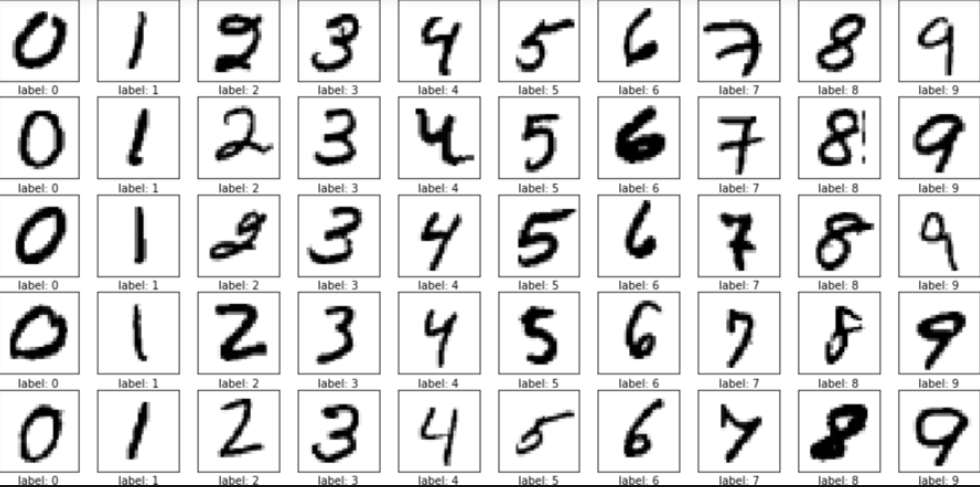

## Import modules for MNIST data, Logistic Regression, SVM, DNN
The data scientist imports Machine Learning packages - Sklearn and Keras.  The data scientist will use sklearn to instantize Logistic Regression and Support Vector Machine and Keras to build Deep Neural Network and Convolutional Neural Network. 

In [42]:
## import modules
import numpy as np
from matplotlib import pyplot as plt

## Logistic Regression model
from sklearn.linear_model import LogisticRegression

## SVM model
from sklearn.svm import SVC

## Keras for DNN
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

from keras.utils import np_utils

## Import MNIST data 
### Data Preparation - only 9 and 3
The data scientis can import MNIST data from kears dataset package, but in this workshop, we will import the saved files from the local drive. 

In [2]:
## MNIST Dataset
#from keras.datasets import mnist

In [4]:
## Import MNIST data 
b = np.load('./data/mnist.npz')

The data scientist has prepared Training data (X_train & y_train) and Validation data (X_test & y_test). <br>
The data scientist will use the training data to train the selected algorithms and the validation data to validate the trained algorithms. 

In [5]:
## train and test data
X_train, y_train, X_test, y_test = b['x_train'], b['y_train'], b['x_test'], b['y_test']

In the workshop, we will use two categories (3,9) and below codes will show how data scientists can subset two categories.  

In [6]:
## Import MNIST data from Keras dataset library
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Train data
# Extract all 9s and  3s
y_train_9 = y_train[y_train == 9]
y_train_3 = y_train[y_train == 3]
X_train_9 = X_train[y_train == 9]
X_train_3 = X_train[y_train == 3]

## concatenate 9 and 3
X_train2 = np.concatenate((X_train_9, X_train_3), axis=0)
y_train2 = np.concatenate((y_train_9, y_train_3), axis=0)

###  Test Data
# Extract all 9s and 3s
y_test_9 = y_test[y_test == 9]
y_test_3 = y_test[y_test == 3]
X_test_9 = X_test[y_test == 9]
X_test_3 = X_test[y_test == 3]

## Concatenate both 9 and 3
X_test2 = np.concatenate((X_test_9, X_test_3), axis=0)
y_test2 = np.concatenate((y_test_9, y_test_3), axis=0)

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)
np.unique(y_train2)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)
(12080, 28, 28) (2019, 28, 28) (12080,) (2019,)


array([3, 9], dtype=uint8)

## Data Visualization
The data scientist can review data using data visualization.  Here, we are using image data, so data scientist will show how the data looks like in image and in number. 

Shape of training data :  (12080, 28, 28)
label ;  3


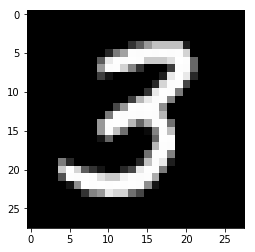

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  51  92 152 193 193
  193 193  30   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  41 123 162 253 252 253 252 253
  252 253 212   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  92 233 254 253 254 253 203 203 203
  223 255 253 102   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 152 252 253 212 131  50   0   0   0
   61 253 252 102   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  62  20   0   0   0   0   

In [27]:
## data review and visuqlization
print("Shape of training data : ", X_train2.shape)
i = 11009
print("label ; ", y_train2[i])

plt.imshow(X_train2[i], cmap='gray')
plt.show()
print(X_train2[i])

The data of above image (X_train2[11009]) is 
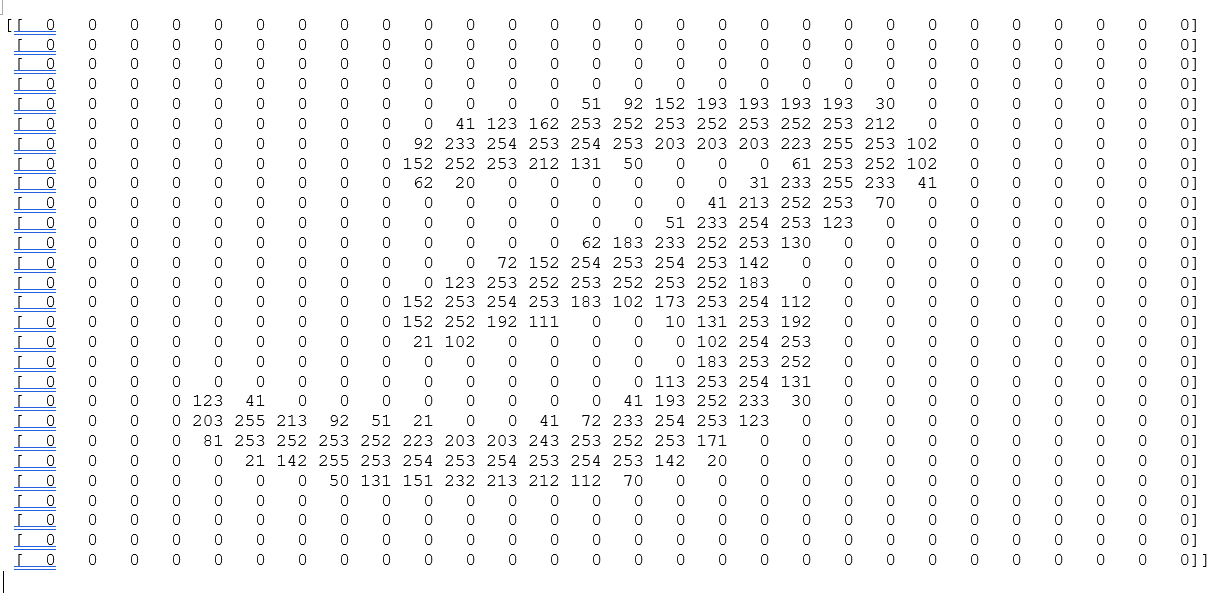

## Feature Engineering
Feature engineering is the step where the data scientist prepares the data suited for machine learning training.

In [9]:
## Feature Engineering - Normalization
X_train3 = X_train2.astype('float32')/255.
X_test3 = X_test2.astype('float32')/255.

## Reshape from 28 by 28 to 784 for model
X_train4 = X_train3.reshape(len(X_train3), np.prod(X_train3.shape[1:]))
X_test4 = X_test3.reshape(len(X_test3), np.prod(X_test3.shape[1:]))

Here, the data scientist converts 3 dimensions to 2 dimensions so that it could be used for logistic regression, SVM and DNN.

In [10]:
print(X_train3.shape, X_test3.shape)
print(X_train4.shape, X_test4.shape)

(12080, 28, 28) (2019, 28, 28)
(12080, 784) (2019, 784)


Here, the data scientist converts 3 to False and 9 to True. 

In [11]:
## Prepare y variables
y_train_binary = y_train2 == 9
y_test_binary = y_test2 == 9

print(np.unique(y_train_binary, return_counts=True))
print(y_train_binary[:10])
print(y_train_binary[1])
print(type(y_train_binary[1]))
y_train_binary[1] == 1

(array([False,  True]), array([6131, 5949], dtype=int64))
[ True  True  True  True  True  True  True  True  True  True]
True
<class 'numpy.bool_'>


True

## Train Machine Learning Algorithms - Logistic Regression, SVM, DNN and CNN
### Logistic Regression
#### Train Logistic Regression model with training data

In [12]:
## Logistic Regression as model
log_reg = LogisticRegression()

## Train the model
log_reg.fit(X_train4, y_train_binary)
log_reg.coef_, log_reg.intercept_

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+0

In [28]:
print("The number of weights of logistic regression model is", len(log_reg.coef_[0]))

The number of weights of logistic regression model is 784


#### Validate the trained logistic regression model with test data

In [76]:
from sklearn import metrics
y_pred_lr = log_reg.predict(X_test4)
print(y_pred_lr)

metrics.precision_score(y_test_binary, y_pred_lr)

[ True  True  True ... False False False]


0.9880597014925373

#### Predict values using the trained model

[9 9 9 ... 3 3 3]
(784,)


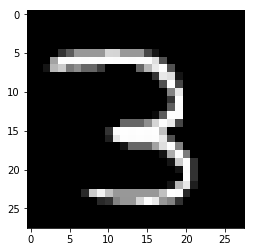

3


In [90]:
## Convert data back to original number
y_pred_lr2 = np.where(y_pred_lr == True,9,3)
print(y_pred_lr2)

i = 1205
print(X_test4[i].shape)
plt.imshow(X_test2[i], cmap='gray')
plt.show()
print(y_pred_lr2[i])


### Support Vector Machine (SVM) Algorithms 

In [15]:
## Pick up SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))

## Train the model
svm_clf.fit(X_train4, y_train_binary)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [92]:
### Validate the accuracy using test data
y_pred_svm = svm_clf.predict(X_test4)
print(y_pred_svm)

metrics.precision_score(y_test_binary, y_pred_svm)

[ True  True  True ... False False False]


0.9742574257425742

### Deep Neural Network (DNN) Algorithms
The data scientist can build deep neural networks using Python Keras. <br>
DNN becomes one of the most popular Machine Learning model and it works well with a lot of data.  
Below is the sample architecture of DNN
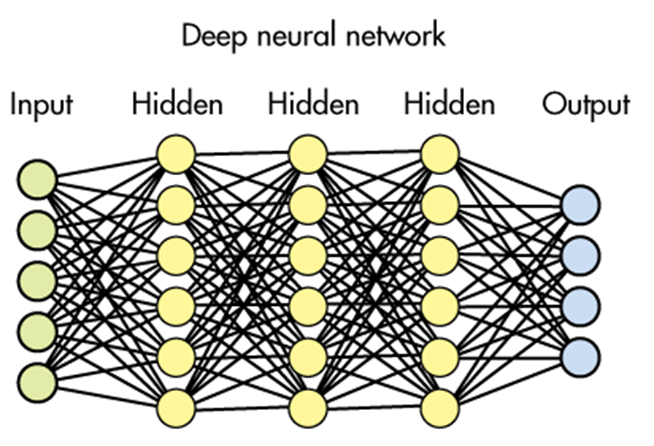


In the workshop, below is the archicteture of DNN that the data scientis builds. <br>
- Input layer : 784 input variables
- First Hidden Layer : 100 neurons
- Second Hidden Layer : 50 neurons
- Third Hiddne Layer : 20 neurons
- Output Layer : binary (0 or 1)

In [17]:
## Build the model
model = Sequential()
model.add(Dense(100, input_dim=X_train4.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 84,591
Trainable params: 84,591
Non-trainable params: 0
_________________________________________________________________


In [19]:
## Set up Callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=5)]

In [20]:
## Train the model with equal weight on True/False label
n_epochs = 50
batch_size = 512
validation_split = 0.01

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['binary_accuracy'])

model.fit(X_train4, y_train_binary, epochs=n_epochs, batch_size=batch_size, shuffle=True, 
          validation_split=validation_split, callbacks=callbacks, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 11959 samples, validate on 121 samples
Epoch 1/50
11959/11959 [==============================] - 1s 66us/step - loss: 0.2526 - binary_accuracy: 0.9167 - val_loss: 0.0470 - val_binary_accuracy: 0.9917
Epoch 2/50
11959/11959 [==============================] - 0s 11us/step - loss: 0.0655 - binary_accuracy: 0.9779 - val_loss: 0.0557 - val_binary_accuracy: 0.9917
Epoch 3/50
11959/11959 [==============================] - 0s 11us/step - loss: 0.0423 - binary_accuracy: 0.9871 - val_loss: 0.0432 - val_binary_accuracy: 0.9917
Epoch 4/50
11959/11959 [==============================] - 0s 11us/step - loss: 0.0326 - binary_accuracy: 0.9903 - val_loss: 0.0538 - val_binary_accuracy: 0.9917
Epoch 5/50
11959/11959 [==============================] - 0s 11us/step - loss: 0.0259 - binary_accuracy: 0.9921 - val_loss: 0.0372 - val_binary_accuracy: 0.9917
Epoch 6/50
11959/11959 [==============================] - 0s 11us/step - loss: 0.0220 - binary_accu

In [21]:
## Evaludation socre
score = model.evaluate(X_test4, y_test_binary, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.029032388198937976
Test accuracy: 0.9925705794947994


### Convolutional Neural Network (CNN)
Convolutional Neural Network is considered as the most effective model for image recognitions.  
The sample architecture of CNN is 
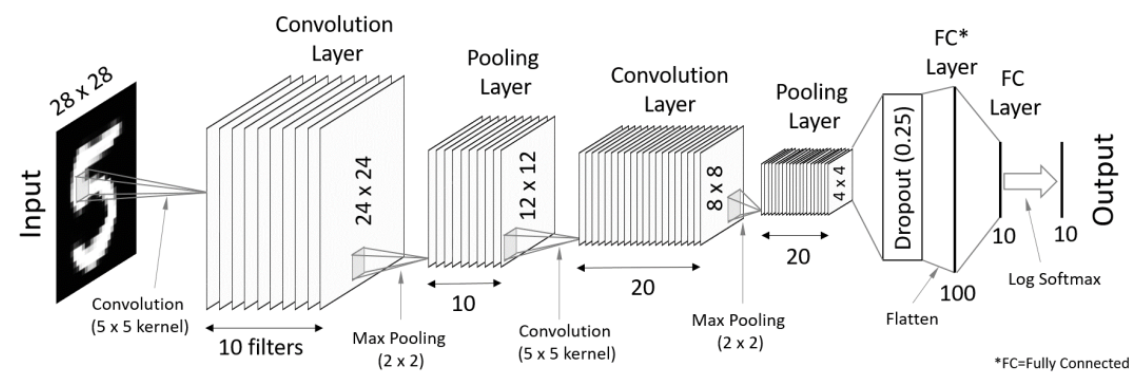

In [69]:
## prepare the input data
## Preare Train and Test data
img_rows, img_cols = X_train2[0].shape[0], X_train2[0].shape[1]

## Prepare input data by reshaping to 3 dimensions
X_train_cnn = X_train2.reshape(X_train2.shape[0], img_rows, img_cols, 1)
X_test_cnn = X_test2.reshape(X_test2.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1) ## 28 by 28 by 1

In [67]:
## Prepare label data
n_classes = len(set(y_train_binary))
y_train_cnn = np_utils.to_categorical(y_train_binary, n_classes)
y_test_cnn = np_utils.to_categorical(y_test_binary, n_classes)

Below is CNN acchitecture that the data scientist builds for the workshop.
- Input layer : 28 by 28 pixel images
- First Convolution : 64 (3 by 3 ) filters
- First Pooling : (2 by 2 ) Maximum value pooling
- Second Convolution : 128 (3 by 3 ) filters
- Second Pooling : (2 by 2 ) Maximum value pooling
- Third Convolution : 256 (3 by 3 ) filters
- Third Pooling : (2 by 2 ) Maximum value pooling
- First Dense Layer : 128 neurons
- Output Layer : binary ( 0 or 1)

In [70]:
## Buiid CNN model

model_cnn = Sequential()

model_cnn.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn.add(Dropout(0.5))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(2, activation='softmax'))

model_cnn.compile(loss=['categorical_crossentropy'], optimizer='adam', metrics=['accuracy'])

model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 256)         295168    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 3, 3, 256)         0         
__________

In [71]:
## Train the model
model_cnn.fit(X_train_cnn, y_train_cnn, batch_size=128, epochs=10, verbose=1, validation_split=0.2, callbacks=callbacks)

Train on 9664 samples, validate on 2416 samples
Epoch 1/10
9664/9664 [==============================] - 22s 2ms/step - loss: 1.4162 - acc: 0.9018 - val_loss: 0.0976 - val_acc: 0.9938
Epoch 2/10
9664/9664 [==============================] - 21s 2ms/step - loss: 0.4156 - acc: 0.9716 - val_loss: 0.0826 - val_acc: 0.9942
Epoch 3/10
9664/9664 [==============================] - 21s 2ms/step - loss: 0.2364 - acc: 0.9840 - val_loss: 0.0805 - val_acc: 0.9946
Epoch 4/10
9664/9664 [==============================] - 21s 2ms/step - loss: 0.2018 - acc: 0.9863 - val_loss: 0.0420 - val_acc: 0.9971
Epoch 5/10
9664/9664 [==============================] - 21s 2ms/step - loss: 0.1425 - acc: 0.9902 - val_loss: 0.0639 - val_acc: 0.9954
Epoch 6/10
9664/9664 [==============================] - 21s 2ms/step - loss: 0.1168 - acc: 0.9919 - val_loss: 0.2173 - val_acc: 0.9863
Epoch 7/10
9664/9664 [==============================] - 21s 2ms/step - loss: 0.1090 - acc: 0.9922 - val_loss: 0.0067 - val_acc: 0.9996
Epoch 8

In [72]:
## Evaludation socre
score = model_cnn.evaluate(X_test_cnn, y_test_cnn, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.052674280467173304
Test accuracy: 0.9965329370975731


### CONCLUSION
Machine Learning workflow is very similar to the workflow that statistical programmers follow to conduct the clinical trial studies.  The main difference is that Machine Learning algorithms and models were not pre-selected, but data scientist is free to try any algorithms to find the best solution for the problems.  In order to build the best application, the data scientist import image data, convert into features and try three different algorithms (Logistic Regression, Support Vector Machine, Deep Neural Network and Convolutional Neural Network).  
Our selected models provide the following accuracy. 
- The accuracy of Logistic Regression model is 98.8%.
- The accuracy of Logistic Regression model is 97.4%.
- The accuracy of Deep Neural Network model is 99.2%. 
- The accuracy of Logistic Regression model is 99.4%.
So, our best models for image data is Convolutional Neural Network because of it gives the best accuracy. 

### REFERENCES
http://jupyter.org/ Jupyter notebook home page <br>
https://www.python.org/ Python home page <br>
https://matplotlib.org/ Python matplotlib home page <br>
https://scikit-learn.org/stable/documentation.html Scikit Learn Document home page <br>
https://keras.io/ Python Deep Learning Library on Keras <br>

### CONTACT INFORMATION
Your comments and questions are valued and encouraged.  Contact the author at: <br>
Kevin Lee <br>
Director of Data Science at Clindata Insight <br>
Klee@clindatainsight.com <br>
Tweet: @HelloKevinLee <br>
LinkedIn: www.linkedin.com/in/HelloKevinLee/ <br>
